In [1]:
######## import the required  packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
######## import csv files #########

worldometer_data=pd.read_csv('worldometer_data.csv')
country_vaccinations=pd.read_csv('country_vaccinations.csv')

In [3]:
######## replace value "United States" as "USA" for Country_vaccinations File data ######

country_vaccinations.loc[country_vaccinations['country']=="United States","country"]="USA" 

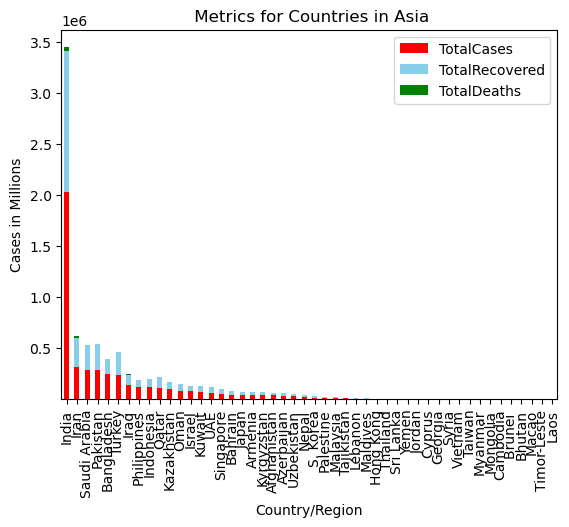

India has the highest total cases in Asia
Laos has the Lowest total cases in Asia


In [4]:
#### Question 1 #####

# The below function stackplots() gets the stack bar plots of Totalcases/Total Recovered/Total Deaths
# of countries of the continent inputed by the user, also printing the countries in the continent with highest and lowest Total cases.

def stackplots(conti):
    #conti=input('Please enter the value of the continent: ')
    data=worldometer_data[worldometer_data['Continent']==conti]
    country=data[['Country/Region','TotalCases','TotalRecovered','TotalDeaths']]
    country = country.set_index('Country/Region')        
    maxcases=country.index[country['TotalCases'] == country['TotalCases'].max()].tolist()[0]
    mincases=country.index[country['TotalCases'] == country['TotalCases'].min()].tolist()[0]
    country.plot.bar( stacked=True, color=['red', 'skyblue', 'green'],title=f" Metrics for Countries in {conti}",ylabel='Cases in Millions')
    plt.show()
    print(f'{maxcases} has the highest total cases in {conti}')    
    print(f'{mincases} has the Lowest total cases in {conti}')       


stackplots('Asia')

C:\Users\anoop\AppData\Local\Temp\ipykernel_25000\7860729.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reldata['recoverpercent']=round((reldata['TotalRecovered']*100)/reldata['TotalCases'],1)
C:\Users\anoop\AppData\Local\Temp\ipykernel_25000\7860729.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reldata['Deathpercent']=round((reldata['TotalDeaths']*100)/reldata['TotalCases'],1)


             Country/Region  recoverpercent  Deathpercent
0                       USA            51.2           3.2
5                    Mexico            66.8          10.9
23                   Canada            87.0           7.6
33       Dominican Republic            53.0           1.6
34                   Panama            63.9           2.2
42                Guatemala            77.4           3.9
46                 Honduras            13.6           3.2
65               Costa Rica            33.4           0.9
68              El Salvador            48.3           2.7
88                    Haiti            64.1           2.3
106               Nicaragua            74.7           3.2
115                    Cuba            86.8           3.2
146                 Jamaica            77.8           1.3
153                 Bahamas            12.0           1.8
170              Guadeloupe            64.2           5.0
171              Martinique            35.5           5.4
173           

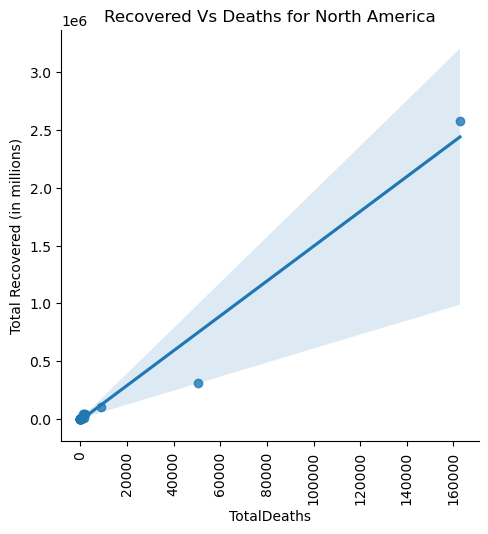

In [8]:
########## Question 2 #########

## the function relation_recoverdeath() gives a line plot showing the relationship between
## Total recovered and Total deaths for the countries in selected Continent.

def relation_recoverdeath(continent):
    
    reldata=worldometer_data[worldometer_data['Continent']==continent]
    reldata['recoverpercent']=round((reldata['TotalRecovered']*100)/reldata['TotalCases'],1)
    reldata['Deathpercent']=round((reldata['TotalDeaths']*100)/reldata['TotalCases'],1)
    print(reldata[['Country/Region','recoverpercent','Deathpercent']])
    
    sns.lmplot(x ='TotalDeaths', y ='TotalRecovered', data = reldata,fit_reg = True)
    ax = plt.gca()
    ax.set_title(f"Recovered Vs Deaths for {continent}")
    ax.set_ylabel('Total Recovered (in millions)')
    plt.xticks(rotation=90)
    plt.show() 


relation_recoverdeath('North America')

Total number of entries for North America is 35
Total number of entries for South America is 14
Total number of entries for Asia is 48
Total number of entries for Europe is 48
Total number of entries for Africa is 57
Total number of entries for Australia/Oceania is 6
Total number of entries for nan is 0


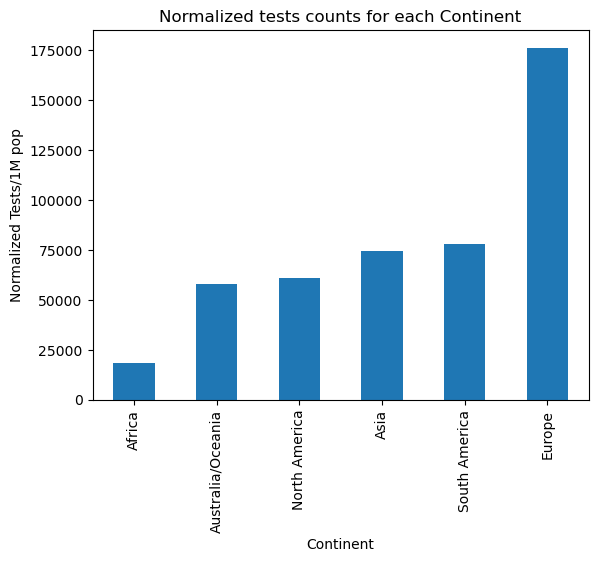

In [6]:
######### Question 3 : Total tests per continent#############

## the function printentries() , calculate the numbe of entries in worldometer_data for each continent
## Also it gives out the average normalized number of tests per 1 million as barplot for each continent

def printentries():
    
    for i in worldometer_data['Continent'].unique():
        
        print(f'Total number of entries for {i} is {len(worldometer_data[worldometer_data.iloc[:,1]==i])}')
        data=worldometer_data[worldometer_data.iloc[:,1]==i]
        
    
    data=worldometer_data[worldometer_data.iloc[:,1]==i]
    continent_values=worldometer_data[['Tests/1M pop','Continent']].groupby(['Continent'])['Tests/1M pop'].mean().sort_values(ascending=True)
    continent_values.plot(kind='bar')
    plt.ylabel('Normalized Tests/1M pop')
    plt.xlabel('Continent')
    plt.title('Normalized tests counts for each Continent')
    plt.show()

printentries()


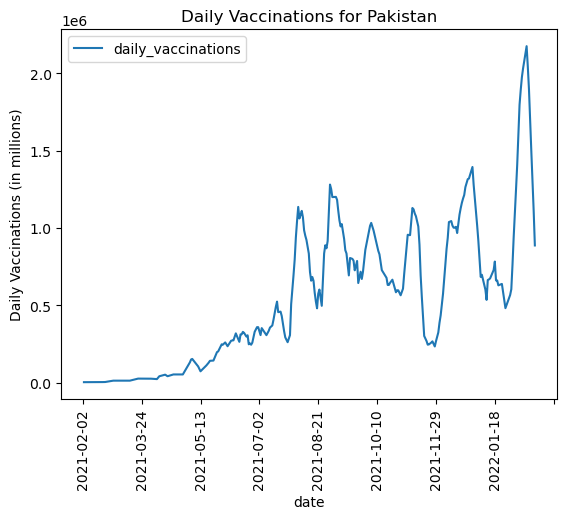

In [7]:
######### Question 4 : Daily vaccinations#####

### The function dailyvaccinations gives out the the Daily vaccinations for the country that is provided by the user.

def dailyvaccinations(countri):
    country_vaccinations
    #countri=input('Please enter the value of the Country: ')
    county_data=country_vaccinations[country_vaccinations['country']==countri]
    county_data.plot(x='date', y='daily_vaccinations')
    plt.xticks(rotation=90)
    plt.title(f"Daily Vaccinations for {countri}")
    plt.ylabel('Daily Vaccinations (in millions)')
    plt.show()

dailyvaccinations('Pakistan')    

Welcome to our analysis Pipeline for COVID-19 data
1- Display cases per country in a specific continent
2- Calculate the Recovered and Death percentages per country in a specific continent
3- Display number of tests per continent
4- Display the daily vaccinations of a specific country
5- Exit
 
 
Please, select one of the  above options:1

Please enter one of the foloowing continent names: 
 North America, South America, Asia,Europe, Africa, Australia/Oceania
Please type a continent Name:Europe



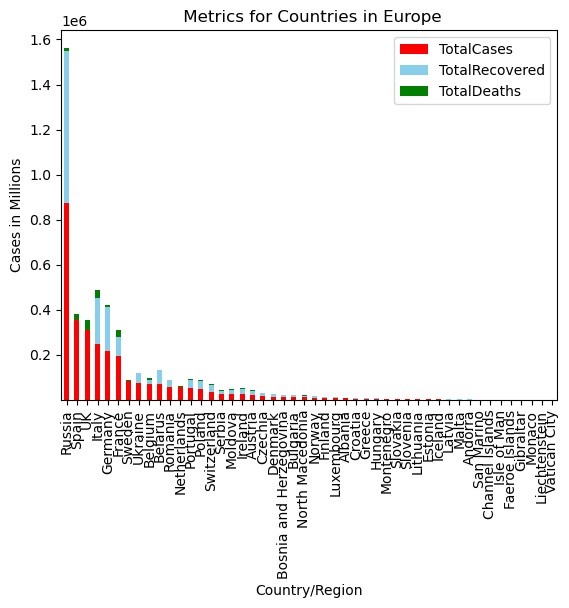

Russia has the highest total cases in Europe
Vatican City has the Lowest total cases in Europe


Welcome to our analysis Pipeline for COVID-19 data
1- Display cases per country in a specific continent
2- Calculate the Recovered and Death percentages per country in a specific continent
3- Display number of tests per continent
4- Display the daily vaccinations of a specific country
5- Exit
 
 
Please, select one of the  above options:2

Please enter one of the foloowing continent names: 
 North America, South America, Asia,Europe, Africa, Australia/Oceania
Please type a continent Name:Africa

            Country/Region  recoverpercent  Deathpercent
4             South Africa            72.0           1.8
26                   Egypt            51.5           5.2
45                 Nigeria            71.7           2.1
50                   Ghana            91.8           0.5
54                 Algeria            69.1           3.8
56                 Morocco            69.3           1.5
61 

C:\Users\anoop\AppData\Local\Temp\ipykernel_25000\7860729.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reldata['recoverpercent']=round((reldata['TotalRecovered']*100)/reldata['TotalCases'],1)
C:\Users\anoop\AppData\Local\Temp\ipykernel_25000\7860729.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reldata['Deathpercent']=round((reldata['TotalDeaths']*100)/reldata['TotalCases'],1)


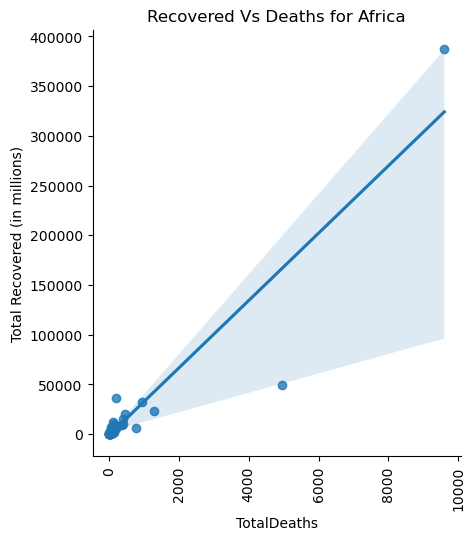



Welcome to our analysis Pipeline for COVID-19 data
1- Display cases per country in a specific continent
2- Calculate the Recovered and Death percentages per country in a specific continent
3- Display number of tests per continent
4- Display the daily vaccinations of a specific country
5- Exit
 
 
Please, select one of the  above options:3

Total number of entries for North America is 35
Total number of entries for South America is 14
Total number of entries for Asia is 48
Total number of entries for Europe is 48
Total number of entries for Africa is 57
Total number of entries for Australia/Oceania is 6
Total number of entries for nan is 0


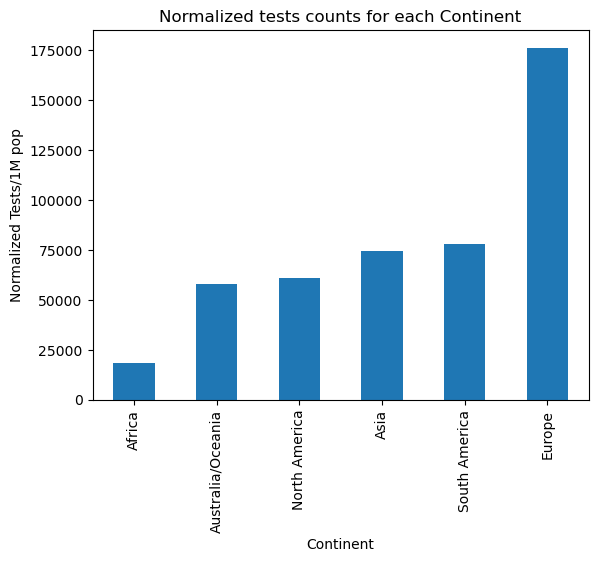



Welcome to our analysis Pipeline for COVID-19 data
1- Display cases per country in a specific continent
2- Calculate the Recovered and Death percentages per country in a specific continent
3- Display number of tests per continent
4- Display the daily vaccinations of a specific country
5- Exit
 
 
Please, select one of the  above options:3

Total number of entries for North America is 35
Total number of entries for South America is 14
Total number of entries for Asia is 48
Total number of entries for Europe is 48
Total number of entries for Africa is 57
Total number of entries for Australia/Oceania is 6
Total number of entries for nan is 0


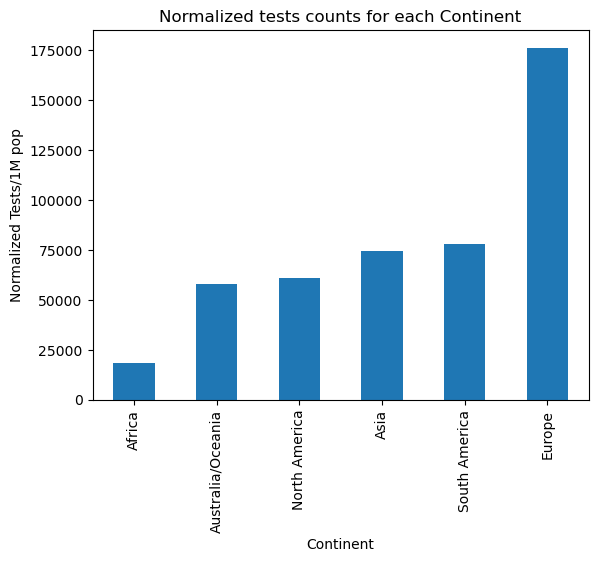



Welcome to our analysis Pipeline for COVID-19 data
1- Display cases per country in a specific continent
2- Calculate the Recovered and Death percentages per country in a specific continent
3- Display number of tests per continent
4- Display the daily vaccinations of a specific country
5- Exit
 
 
Please, select one of the  above options:4

Please enter one of the following country names: 
 Ireland, USA, India, Brazil, Japan, Australia
Please type a countries Name:Japan



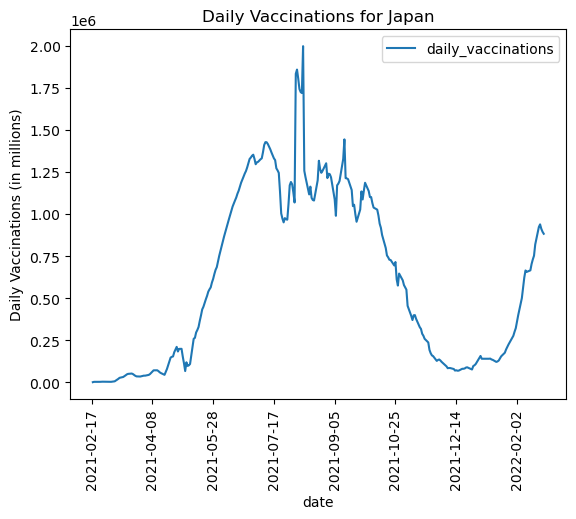



Welcome to our analysis Pipeline for COVID-19 data
1- Display cases per country in a specific continent
2- Calculate the Recovered and Death percentages per country in a specific continent
3- Display number of tests per continent
4- Display the daily vaccinations of a specific country
5- Exit
 
 
Please, select one of the  above options:5

Thank You for showing interest !!!




In [14]:
######## Question 5 #######

### the main function uses the above 4 functions as shows output as per user selection
## The inputs for selection, Continentname and countryname are verified before printing out the output, else the user 
## is asked to re-eneter tha values.
## Option 1 : Displays the Barchart by stackplots() funtion.
## Option 2 : Shows the percentage values of countrywise and the lineplot showing the trend,using function relation_recoverdeath().
## Option 3 : Displays number of tests and number of entries per Continent using function printentries().
## Option 4 : Displays the time series plot of the Daily vaccinations for the selected country , using function dailyvaccinations
## Option 5 : Exists the system with a message "Thank You for showing interest !!!"

def main():
    flag=True
    while flag==True:
        print('Welcome to our analysis Pipeline for COVID-19 data')
#        print('Please, select one of the  following options:')
        print('1- Display cases per country in a specific continent')
        print('2- Calculate the Recovered and Death percentages per country in a specific continent')
        print('3- Display number of tests per continent')
        print('4- Display the daily vaccinations of a specific country')
        print('5- Exit')
        print(' ')
        print(' ')


        ip=int(input('Please, select one of the  above options:'))
        print('')
        
        optionflag= (ip in [1,2,3,4,5])
        
        
        if optionflag==True:  #### checking valid values for options provided by the user.
                
            if ip==1 or ip==2:
                print('Please enter one of the foloowing continent names: \n North America, South America, Asia,' 
                      'Europe, Africa, Australia/Oceania')
                continentFlag=True
                while continentFlag==True: #### checking valid values for Continent 
                    continentnvar=input('Please type a continent Name:')
                    print('')
                    continentFlag= (continentnvar in ['North America','South America','Asia','Europe','Africa','Australia/Oceania'])
                    if continentFlag==True:
                        
                        if ip==1:
                            stackplots(continentnvar)
                            print('')
                            print('')

                        else:
                            relation_recoverdeath(continentnvar)
                            print('')
                            print('')
                            flag=True
                        continentFlag=False
                        flag=True
                    else:
                        print('WARNING: PLEASE RE-ENTER ONLY FROM THE LISTED CONTINENTS (Case Sensitive)') ## Warning message when wrong continent provided
                        continentFlag=True
                        flag=True
                        print('')
                        print('')
                        
            elif ip==5:
                print('Thank You for showing interest !!!')
                print('')
                print('')

                flag=False
            elif ip==3:
                printentries()
                print('')
                print('')

                flag=True
            elif ip==4:
                print('Please enter one of the following country names: \n Ireland, USA, India, Brazil, Japan, Australia')
                                
                countryflag=True
                
                while countryflag==True:
                    countryvar=input('Please type a countries Name:')
                    print('')
                    countryflag= (countryvar in ['Ireland','USA','India','Brazil','Japan','Australia']) #### checking valid values for Country provided by the user.
                    if countryflag==True:
                        dailyvaccinations(countryvar)
                        countryflag=False
                        flag=True
                    else:
                        print('WARNING: PLEASE RE-ENTER ONLY FROM THE LISTED COUNTRIES (Case Sensitive)') ## Warning message when wrong Country provided
                        countryflag=True
                        flag=True
                    print('')
                    print('')

        else:
            print('WARNING: PLEASE RE-ENTER A VALID OPTION (1-5) , TRY AGAIN !!') ## Warning message when wrong Option value provided
       

main()  
     

Welcome to our analysis Pipeline for COVID-19 data
1- Display cases per country in a specific continent
2- Calculate the Recovered and Death percentages per country in a specific continent
3- Display number of tests per continent
4- Display the daily vaccinations of a specific country
5- Exit
 
 


KeyboardInterrupt: Interrupted by user